# P制御

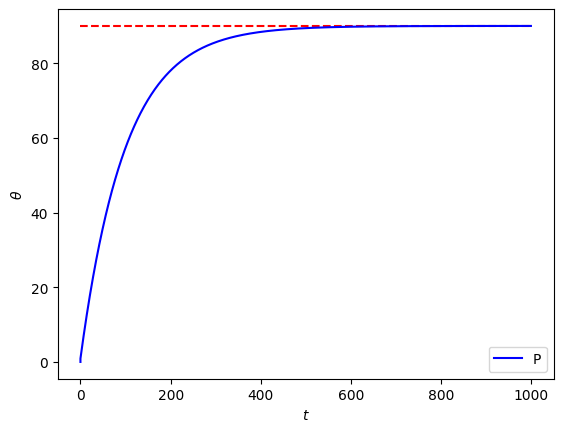

In [205]:
from matplotlib import pyplot as plt # 描画用ライブラリ

# 関数定義 --------------------
# P制御
def P(kp, theta_goal, theta_current):
    error = theta_goal - theta_current # 偏差（error）を計算
    m = kp*error # 操作量（Manipulative Variable）を計算（例：電圧，トルクなど）
    return m

# 係数や初期値，目標値を設定 ------
kp = 0.01 # 比例ゲイン
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 1000 # 計測時刻
theta_current = theta_start # 現在角度
time_list = [0] # 時刻のリスト（描画用）
theta_list = [theta_start] # 現在地のリスト（描画用）

# 制御 -------------------------
for time in range(time_length):
    m = P(kp, theta_goal, theta_current) # 操作量を計算
    theta_current += m # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
    time_list.append(time) # 描画用
    theta_list.append(theta_current) # 描画用

# 描画 --------------------------
plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed') #ゴールを赤色の点線で表示
plt.plot(time_list, theta_list, label="P", color="blue") # P制御のグラフを描画
plt.xlabel(r'$t$') 
plt.ylabel(r'$\theta$') 
plt.legend(loc='lower right') # 凡例を表示
plt.show() # 表示

# P制御，PI制御

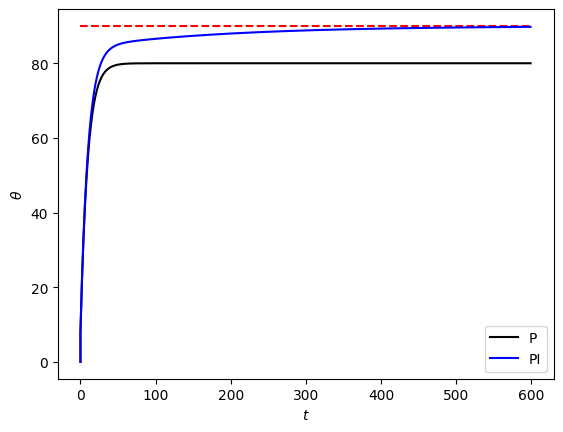

In [206]:
from matplotlib import pyplot as plt

# ------------------------------- P制御関連 -------------------------------
# 関数の定義 -------------------
# P制御の定義
def P(kp, theta_goal, theta_current):
    error = theta_goal - theta_current# 偏差（error）を計算
    m = kp*error # 操作量（Manipulative Variable）を計算（例：モータのトルクなど）
    return m

# 係数等設定 --------------------
kp = 0.1 # 比例ゲイン
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 600 # 計測時間
offset = 1.0 # 追加：定常偏差
theta_current = theta_start # 現在角度
time_list = [0] # 時刻のリスト（描画用）
theta_list = [theta_start] # 現在地のリスト（描画用）

# 制御 --------------------------
for time in range(time_length):
    m = P(kp, theta_goal, theta_current) # 操作量を計算
    theta_current += m # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
    theta_current -= offset # # 追加：定常偏差分だけ引く
    time_list.append(time) # 描画用
    theta_list.append(theta_current) # 描画用

# 描画 --------------------------
plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed') #ゴールを赤色の点線で表示
plt.plot(time_list, theta_list, label="P", color="black") # P制御のグラフ描画

# ------------------------------- PI制御関連 -------------------------------
# 関数の定義 -----------------------
# PI制御
def PI(kp, ki, theta_goal, theta_current, error_sum):
    error = theta_goal - theta_current# 偏差（error）を計算
    error_sum += error # P制御からの追加：誤差の総和（積分）を計算
    m = (kp * error) + (ki * error_sum) # 操作量を計算
    return m, error_sum

# 係数などの設定 ----------------------
ki = 0.0005 # 積分ゲイン
error_sum = 0.0 # 偏差の総和（積分）

# P制御時の数値を初期化
theta_start = 0.0; theta_current = theta_start; time_list = [0]; theta_list = [theta_start]

# 制御 --------------------------------
for time in range(time_length):
    m_val, error_sum = PI(kp, ki, theta_goal, theta_current, error_sum) # 操作量を計算
    theta_current = theta_current + m_val # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
    theta_current -= offset # 定常偏差分だけ引く
    time_list.append(time) # 描画用
    theta_list.append(theta_current) # 描画用

# 描画 -------------------------------
plt.plot(time_list, theta_list, label="PI", color="blue") # PI制御の結果を描画
plt.xlabel(r'$t$') 
plt.ylabel(r'$\theta$') 
plt.legend(loc='lower right') # 凡例を表示
plt.show() # グラフ表示

# PI制御，PID制御

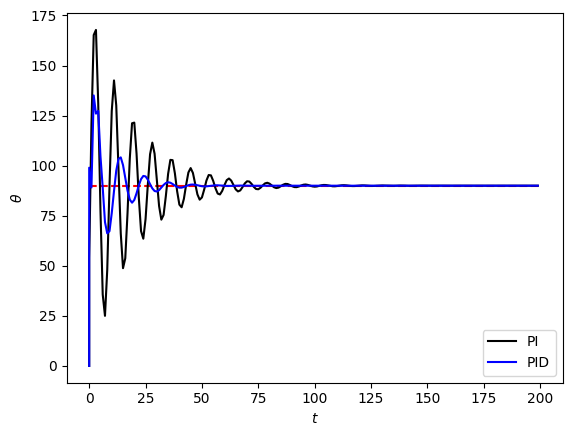

In [207]:
from matplotlib import pyplot as plt

# ------------------------------- PI制御関連 -------------------------------
# 関数の定義 ------------------------
# PI制御
def PI(kp, ki, theta_goal, theta_current, error_sum):
    error = theta_goal - theta_current# 偏差（error）を計算
    error_sum += error # 誤差の総和（積分）を計算
    m = (kp * error) + (ki * error_sum) # 操作量を計算
    return m, error_sum

# 係数などの設定 --------------------
kp = 0.1 # 比例ゲイン
ki = 0.5 # 積分ゲインの値を大きくして，意図的に振動を発生させる
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 200 # 計測時間 
theta_current = theta_start # 目標角度
error_sum = 0.0 # 偏差の総和（積分）
time_list = [0] # 時刻のリスト（描画用）
theta_list = [theta_start] # 現在地のリスト（描画用）

# 制御 ------------------------
for time in range(time_length):
    m, error_sum = PI(kp, ki, theta_goal, theta_current, error_sum) # 制御量を計算
    theta_current += m # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
    time_list.append(time) # 描画用
    theta_list.append(theta_current) # 描画用
    
# 描画 --------------------------
plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed') #ゴールを赤色の点線で表示
plt.plot(time_list, theta_list, label="PI", color="black") # PI制御のグラフを描画

# ------------------------------- PID制御関連 -------------------------------
# 関数の定義 ---------------------
# PID制御
def PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre):
    error = theta_goal - theta_current# 偏差（error）を計算
    error_sum += error # 誤差の総和（積分）を計算
    error_diff = error-error_pre # PI制御からの追加：1時刻前の誤差と現在の誤差の差分（微分）を計算
    m = (kp * error) + (ki * error_sum) + (kd*error_diff) # 操作量を計算
    return m, error_sum, error

# 係数などの設定 ------------------
kd = 0.5 # 微分ゲイン：急激な変化を抑える
error_pre = 0.0 # 1時刻前の偏差
# PI制御の時の数値を初期化
theta_start = 0.0; theta_current = theta_start; error_sum = 0.0; time_list = [0]; theta_list = [theta_start] 

# PID制御 -----------------------
for time in range(time_length):
    m, error_sum, error = PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre) # 操作量を計算
    theta_current += m # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
    error_pre = error # 一時刻前の偏差として保存しておく（D制御用）
    time_list.append(time) # 描画用
    theta_list.append(theta_current) # 描画用

# 描画
plt.plot(time_list, theta_list, label="PID", color="blue") # PID制御のグラフを描画
plt.xlabel(r'$t$') 
plt.ylabel(r'$\theta$') 
plt.legend(loc='lower right') # 凡例を表示
plt.show() # グラフの表示

# アニメーション

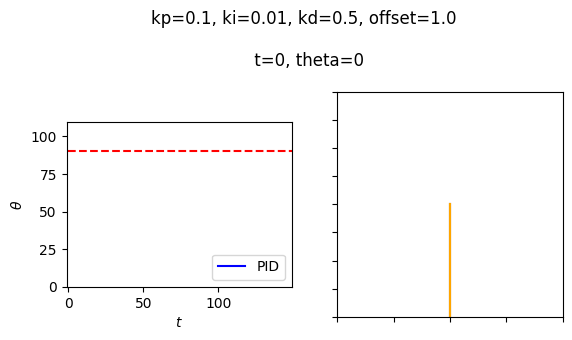

In [16]:
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import pyplot as plt
%matplotlib inline

# ------------------------------- PID制御関連 -------------------------------
# 関数の定義 ---------------------
# PID制御
def PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre):
    error = theta_goal - theta_current# 偏差（error）を計算
    error_sum += error # 誤差の総和（積分）を計算
    error_diff = error-error_pre # PI制御からの追加：1時刻前の誤差と現在の誤差の差分（微分）を計算
    m = (kp * error) + (ki * error_sum) + (kd*error_diff) # 操作量を計算
    return m, error_sum, error

# 係数などの設定 --------------------
# 以下の変数の数値を変えると結果が変わる
kp = 0.1 # 比例ゲイン
ki = 0.01 #0.5 # 積分ゲインの値を大きくして，意図的に振動を発生させる
kd = 0.5 #0.5 # 微分ゲイン：急激な変化を抑える
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 150 #150 # 計測時間 
offset = 1.0 # 定常偏差

# 以下の変数は変えなくて良い
theta_current = theta_start # 目標角度
error_sum = 0.0 # 偏差の総和（積分）
error_pre = 0.0 # 1時刻前の偏差
time_list = [0] # 時刻のリスト（描画用）
theta_list = [theta_start] # 現在地のリスト（描画用）
animation_time_list = [time_list.copy()]
animation_theta_list = [theta_list.copy()]

# PID制御 -----------------------
for time in range(time_length):
    m, error_sum, error = PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre) # 操作量を計算
    theta_current += m # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
    theta_current -= offset
    error_pre = error # 一時刻前の偏差として保存しておく（D制御用）
    time_list.append(time) # 描画用
    theta_list.append(theta_current) # 描画用
    animation_time_list.append(time_list.copy())
    animation_theta_list.append(theta_list.copy())

# ------------------------- アニメーション関連 -------------------------------------
# PID制御のグラフ描画
def plot_pid_graph(ax, time, theta_goal, animation_time_list, animation_theta_list):
    ax.hlines([theta_goal], 0, max(animation_time_list[-1]), "red", linestyles='dashed') #ゴールを赤色の点線で表示
    ax.plot(animation_time_list[time], animation_theta_list[time], label="PID", color="blue") # PID制御のグラフを描画
    ax.set_xlim(-1, max(animation_time_list[-1])) # min=0の場合，グラフの左端が切れるので，min=-1に設定
    if max(animation_theta_list[-1]) < theta_goal: # 定常偏差によりtheta_goalよりもグラフが下回ってしまったらtheta_goalの赤い点線が見えるように範囲を設定
        ax.set_ylim(0, theta_goal+1) # 赤い点線が見えるように +1 している
    else:
        ax.set_ylim(0, max(animation_theta_list[-1])+1)# 赤い点線が見えるように +1 している
    ax.set_xlabel(r'$t$') 
    ax.set_ylabel(r'$\theta$') 
    ax.legend(loc='lower right') # 凡例を表示

# ロボットアームの描画
def plot_robot_arm(ax, time, animation_theta_list):
    ax.plot([0,0], [0,-1], color="black") # 固定リンク
    rad = math.radians(animation_theta_list[time][-1]-90) # 真下方向を0°とする
    x = math.cos(rad) # 順運動学
    y = math.sin(rad) # 順運動学
    ax.plot([0,x], [0,y], color="orange") # 稼働リンク
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    
# figureを作成
fig = plt.figure()
ax_pid = fig.add_subplot(1, 2, 1)
ax_arm = fig.add_subplot(1, 2, 2)
ax_pid.set_aspect("equal")#画像の比率を同じにする
ax_arm.set_aspect("equal")#画像の比率を同じにする
ax_arm.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False) # 軸のメモリを消す（ロボットアーム側はメモリの情報は不要なので）

# 各フレーム毎の描画処理
def update(time):
    ax_pid.cla()
    ax_arm.cla()
    plot_pid_graph(ax_pid, time, theta_goal, animation_time_list, animation_theta_list)
    plot_robot_arm(ax_arm, time, animation_theta_list)
    plt.suptitle('kp={}, ki={}, kd={}, offset={} \n \n t={}, theta={:.3g}'.format(kp, ki, kd, offset, animation_time_list[time][-1], animation_theta_list[time][-1]), x=0.5, y=0.90) # タイトルに時間と角度を表示
 
# アニメーション化
ani = FuncAnimation(fig, update, interval=50, frames=len(time_list))
HTML(ani.to_jshtml()) # HTMLに
#ani.save('pid.mp4', writer="ffmpeg") # mp4で保存．これを実行すると処理時間が増加します

# インタラクティブ

In [14]:
import matplotlib.pyplot as plt
import ipywidgets

# ------------------------------- ウィジェット，インタラクティブの設定関連 ------------------------------
# text widgetsを作成 -> Vboxに格納して縦に並べる
def generate_vbox_text_widget():
    text_widgets = []
    text_widgets.append(ipywidgets.FloatText(min=0.0, max=359.0)) # theta_start
    text_widgets.append(ipywidgets.FloatText(min=0.0, max=359.0)) # theta_goal
    text_widgets.append(ipywidgets.FloatText(min=0.0, max=100.0)) # offset
    text_widgets.append(ipywidgets.IntText(min=-360, max=360)) # time_length
    text_widgets.append(ipywidgets.FloatText(min=0.00, max=1.50)) # kp
    text_widgets.append(ipywidgets.FloatText(min=0.00, max=1.50)) # ki
    text_widgets.append(ipywidgets.FloatText(min=0.00, max=1.50)) # kd
    vox_text_widgets = ipywidgets.VBox(text_widgets)
    return vox_text_widgets

# slider widgetsを7個作成 -> Vboxに格納して縦に並べる．
def generate_vbox_slider_widget():
    slider_widgets = []
    slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=0.0, max=359.0, description = "theta_start", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=90.0, min=0.0, max=359.0, description = "theta_goal", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=0.0, max=100.0, step=0.01, description = "offset", disabled=False))
    slider_widgets.append(ipywidgets.IntSlider(value=150, min=0, max=2000, description = "time_length", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=0.10, min=0.00, max=1.50, step=0.001, description = "kp", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=0.50, min=0.00, max=1.50, step=0.001, description = "ki", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=0.50, min=0.00, max=1.50, step=0.001, description = "kd", disabled=False))
    vox_slider_widgets = ipywidgets.VBox(slider_widgets)
    return vox_slider_widgets


# Box内の複数のwidetを連携させる（二つのbox内のwidgetの数が同じである必要あり）
def link_slider_and_text(box1, box2):
    for i in range(7):
      ipywidgets.link((box1.children[i], 'value'), (box2.children[i], 'value'))

# 結果を表示
def draw_interactive():
    # slider widgetを作成
    sliders = generate_vbox_slider_widget()
    # text widgetを作成
    texts = generate_vbox_text_widget()

    # slider widget と　posture widget を横に並べる
    slider_and_text = ipywidgets.Box([sliders, texts])

    # slider wiget と text widget を連携
    link_slider_and_text(sliders, texts)

    # main文にslider widgetsの値を渡す
    params = {}
    for i in range(7):
        params[str(i)] = sliders.children[i]
    final_widgets = ipywidgets.interactive_output(main, params)
    
    display(slider_and_text, final_widgets)

# -------------------------------------- PID制御関連 ----------------------------------------
def PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre):
    error = theta_goal - theta_current# 偏差（error）を計算
    error_sum += error # 誤差の総和（積分）を計算
    error_diff = error-error_pre # PI制御からの追加：1時刻前の誤差と現在の誤差の差分（微分）を計算
    m = (kp * error) + (ki * error_sum) + (kd*error_diff) # 操作量を計算
    return m, error_sum, error

def main(*args, **kwargs):
    # 係数などの設定 --------------------
    # スライダーやテキストボックスから得られた数値を代入
    params = kwargs
    theta_start = params["0"]
    theta_goal = params["1"]
    offset = params["2"]
    time_length = params["3"]
    kp = params["4"]
    ki = params["5"]
    kd = params["6"]
    # その他初期設定
    error_sum = 0.0
    error_pre = 0.0
    theta_current = theta_start
    time_list = [0]
    theta_list = [theta_start]

    # PID制御 -----------------------
    for time in range(1, time_length):
        m, error_sum, error = PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre) # 操作量を計算
        theta_current += m # 現在角度に操作量を足す（実際は，この操作量をもとにモータを動かす）
        theta_current -= offset
        error_pre = error # 一時刻前の偏差として保存しておく（D制御用）
        time_list.append(time) # 描画用
        theta_list.append(theta_current) # 描画用

    # 描画
    plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed') #ゴールを赤色の点線で表示
    plt.plot(time_list, theta_list, label="PID", color="blue") # PID制御のグラフを描画
    plt.xlabel(r'$t$') 
    plt.ylabel(r'$\theta$') 
    plt.ylim(theta_start-20, theta_goal+60) # 大体の場合において，グラフが収まる範囲に設定（適当）
    plt.legend(loc='lower right') # 凡例を表示
    plt.title(r'final $\theta$={:.3g}'.format(theta_list[-1])) # タイトルに時間と角度を表示
    plt.show() # グラフの表示

# インタラクティブ描画実行
draw_interactive()

Box(children=(VBox(children=(FloatSlider(value=0.0, description='theta_start', max=359.0), FloatSlider(value=9…

Output()

In [15]:
!python3 -V

Python 3.10.9
